In [85]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import  Ridge
from sklearn.model_selection import cross_val_score
import  statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib
from sklearn.decomposition import  PCA
from sklearn.cluster import  KMeans



In [86]:
df = pd.read_csv('/Users/tianyangsun/Documents/Uob_Y3_S1/Machine_learning/exercises/pycharm_regression/housing.csv')
print ("number of rows and cols" + str(df.shape))

df.head()

df.isnull().sum()



number of rows and cols(20640, 10)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

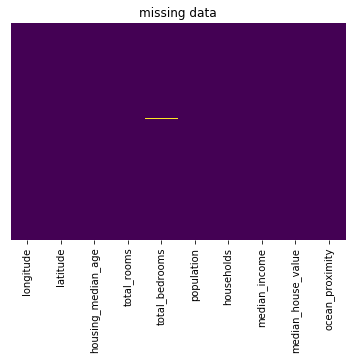

In [87]:
# show the missing data
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

plt.title('missing data')
plt.show()


In [88]:
# modify the column in the data 

df['total_bedrooms'] = df['total_bedrooms'].fillna(535)
# check is any value is mising in modified house
df.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [5]:
# deal with outliers or b
#df['total_bedrooms'].apply(np.log)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,535.284351,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.053240,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


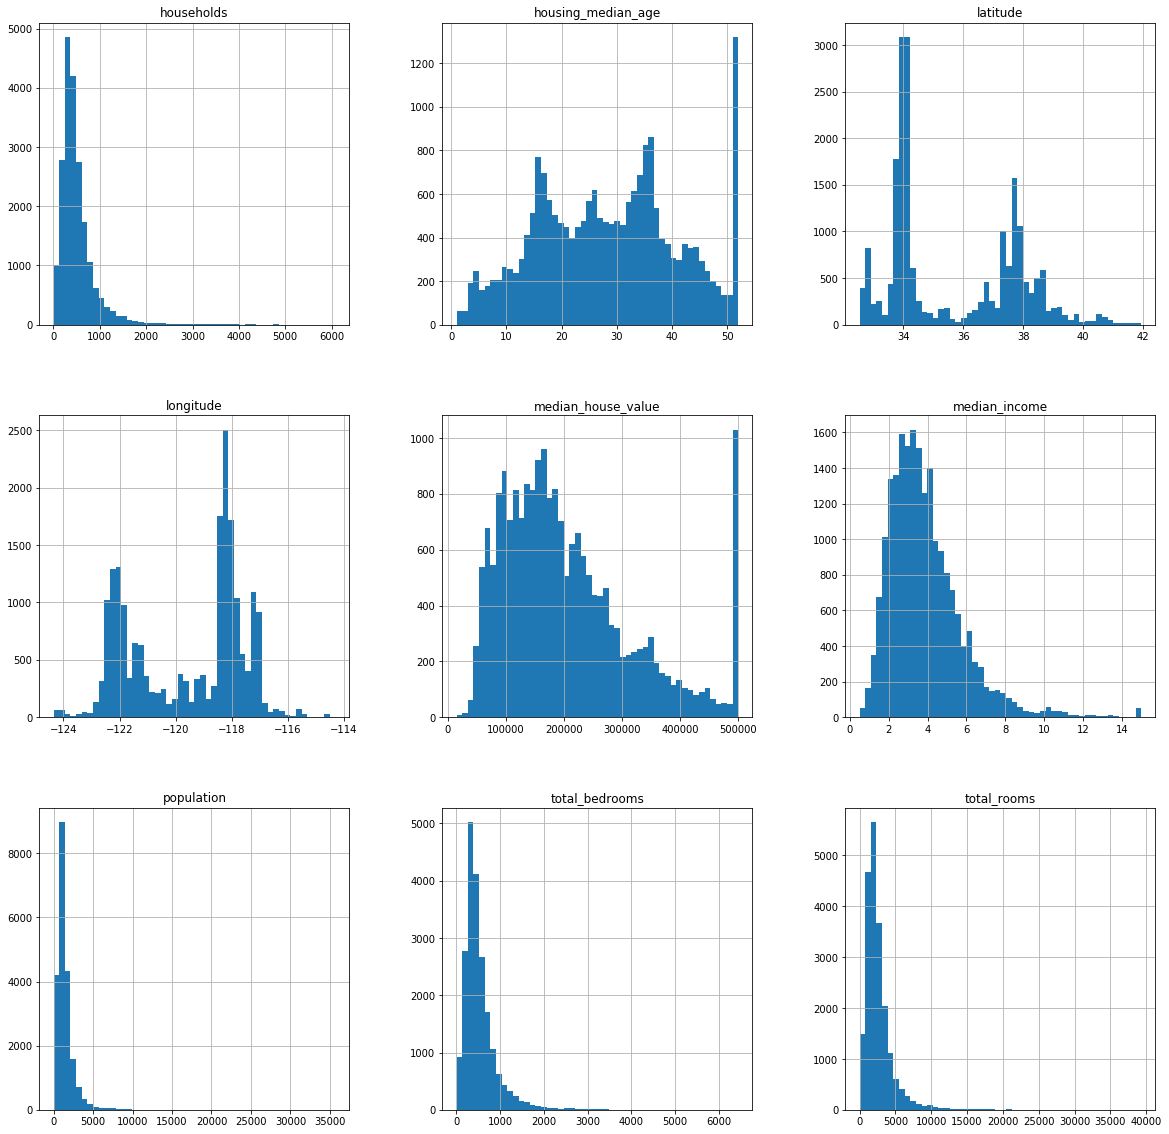

In [6]:
# visualization of each row
df.hist(bins=50, figsize=(20, 20))
plt.show()


In [7]:
# finding correlations and visualize the correlation
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068831,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066147,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318710,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.925723,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.068831,-0.066147,-0.318710,0.925723,1.000000,0.871989,0.972731,-0.007511,0.049406
population,0.099773,-0.108785,-0.296244,0.857126,0.871989,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.972731,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007511,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049406,-0.024650,0.065843,0.688075,1.000000


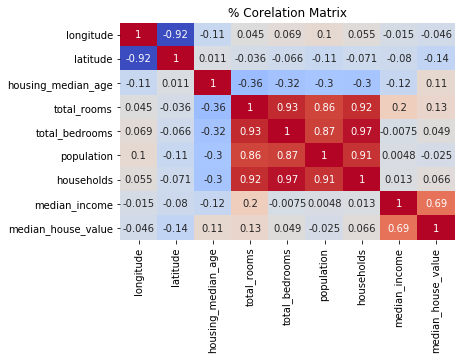

In [8]:
#visualizing the covariance matrix
sns.heatmap(cbar=False,annot=True,data=df.corr(),cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

In [9]:
# according to the cov_matrix, we can do the following feature engineering
df['num_of_bedrooms'] = df['total_bedrooms']/df['households'] # bedrooms per house
df['num_of_rooms'] = df['total_rooms'] / df['households'] # rooms per household
df['population_per_house'] = df['population'] / df['households'] # population per household

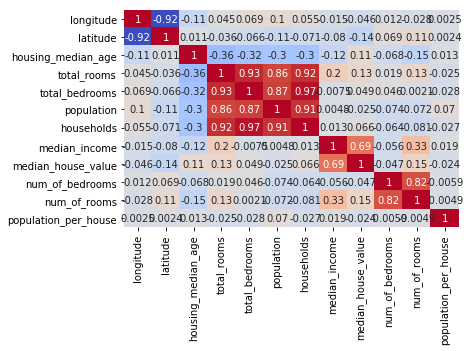

In [10]:
sns.heatmap(cbar=False,annot=True,data=df.corr(),cmap='coolwarm')

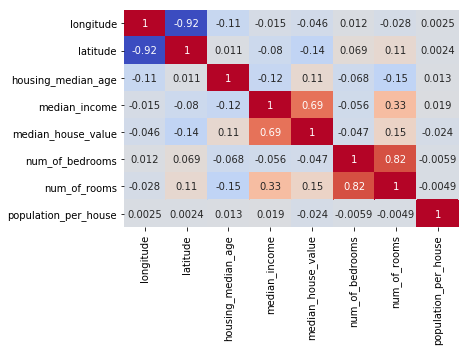

In [11]:
df.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis = 1, inplace = True)
sns.heatmap(cbar=False,annot=True,data=df.corr(),cmap='coolwarm')

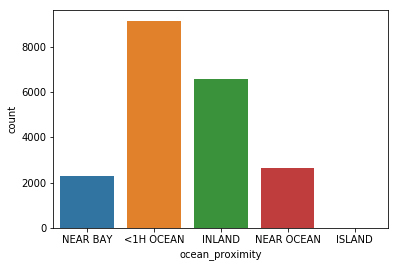

In [12]:
#deal with "near bay" etc, the dtypes shows that ocean_proximity is not numerial values
df.dtypes
sns.countplot(data = df, x='ocean_proximity')

In [13]:
ocean_num = {"ocean_proximity" : {"NEAR BAY": 1, "<1H OCEAN": 2, "INLAND": 3, "NEAR OCEAN": 4, "ISLAND": 5}}
df.replace(ocean_num, inplace=True)
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,num_of_bedrooms,num_of_rooms,population_per_house
0,-122.23,37.88,41.0,8.3252,452600.0,1,1.023810,6.984127,2.555556
1,-122.22,37.86,21.0,8.3014,358500.0,1,0.971880,6.238137,2.109842
2,-122.24,37.85,52.0,7.2574,352100.0,1,1.073446,8.288136,2.802260
3,-122.25,37.85,52.0,5.6431,341300.0,1,1.073059,5.817352,2.547945
4,-122.25,37.85,52.0,3.8462,342200.0,1,1.081081,6.281853,2.181467


In [14]:
df.dtypes # now all the data should be numeric

longitude               float64
latitude                float64
housing_median_age      float64
median_income           float64
median_house_value      float64
ocean_proximity           int64
num_of_bedrooms         float64
num_of_rooms            float64
population_per_house    float64
dtype: object

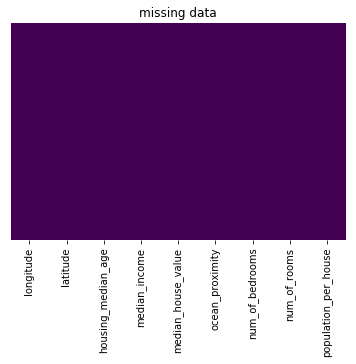

In [15]:
df.isnull().sum()
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

plt.title('missing data')
plt.show()


In [16]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
median_income           0
median_house_value      0
ocean_proximity         0
num_of_bedrooms         0
num_of_rooms            0
population_per_house    0
dtype: int64

In [50]:
# use linear regression as baseline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
# get x and y in this baseline model
x=df.drop('median_house_value',axis=1).values
y=df['median_house_value'].values

#should i scale the y??
y_scaled = preprocessing.scale(y)

In [56]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y_scaled,test_size=0.3,random_state=2)

clf = LinearRegression()
clf.fit(xtrain,ytrain)

prediction = clf.predict(xtest)

In [60]:
score = clf.score(xtest, ytest)
r2 = r2_score(ytest, prediction)
rmse = np.sqrt(mean_squared_error(prediction, ytest))

print ("RMSE = ", rmse)
print ("score = ", score)
print ("r2_score", r2)

RMSE =  0.6468996239173195
score =  0.5881460824152587
r2_score 0.5881460824152587


In [100]:
def regression_model(x, y, model):
    regressor=model
    regressor.fit(x,y)
    lr_rmse=np.sqrt(mean_squared_error(y,regressor.predict(x)))
    cv_regressor=cross_val_score(cv=10,X=x,y=y,estimator=regressor,scoring='r2')
    print('The cross validated accuracy  - '+str(100*cv_regressor.mean()))
    print('The corss validated variance is - '+str(100*cv_regressor.std()))
    return regressor

#def scoring (trainx, trainy, testx, testy, model):
    #regression = model()
    #regression.fit(trainx, trainy)
    #prediction = regression.predict(testx)
    #score = regression.score(testx, testy)
    print("The score without cross validation:", score)
    
    #plt.figure(figsize=(15,8))
    #plt.xlabel('(ytest) - (ypred)')
    #plt.ylabel('frequency')
    #plt.title('residual plot')
    #plt.hist(testy-prediction)
    #print("root mean squared error for test data   is "+str(np.sqrt(mean_squared_error(testy,prediction))))
    
    #return score

def cross_validation_scoring (x, y, estimator):
    regressor=estimator
    regressor.fit(x,y)
    lr_rmse=np.sqrt(mean_squared_error(y,regressor.predict(x)))
    cv_regressor=cross_val_score(cv=10,X=x,y=y,estimator=regressor,scoring='r2')
    print('The cross validated accuracy  - '+str(100*cv_regressor.mean()))
    print('The corss validated variance is - '+str(100*cv_regressor.std()))
    return regressor

def evaluate(ypred,ytest,regressor):
    #plt.figure(figsize=(15,8))
    #plt.xlabel('(ytest) - (ypred)')
    #plt.ylabel('frequency')
    #plt.title('residual plot')
    #plt.hist(ytest-ypred)
    print("root mean squared error for test data   is "+str(np.sqrt(mean_squared_error(ytest,ypred))))
    #plt.show()
    

In [101]:
# linear regression with all features
l = regression_model(xtrain, ytrain, LinearRegression())
evaluate(l.predict(xtest), ytest, l)

The cross validated accuracy  - 60.1199590051991
The corss validated variance is - 2.1575359356769046
root mean squared error for test data   is 0.6468996239173195


In [102]:
# lasso regression
l = regression_model(xtrain, ytrain, Lasso())
evaluate(l.predict(xtest), ytest, l)

The cross validated accuracy  - 20.93829227219593
The corss validated variance is - 0.40961400959079175
root mean squared error for test data   is 0.8972081530491729


In [103]:
# decision trees
l = regression_model(xtrain, ytrain, DecisionTreeRegressor())
evaluate(l.predict(xtest), ytest, l)
#dt= scoring (xtrain, ytrain, xtest, ytest, DecisionTreeRegressor)
#dt.fit(xtrain,ytrain)
#print('mean squared errror is',end='\t-')
#np.sqrt(mean_squared_error(ytest,dt.predict(xtest)))


The cross validated accuracy  - 61.18908585523282
The corss validated variance is - 2.6994965191571274
root mean squared error for test data   is 0.6067649987174938


In [104]:
#ridgeRegression
l = regression_model (xtrain, ytrain, Ridge())
evaluate(l.predict(xtest), ytest, l)

The cross validated accuracy  - 60.12108279639219
The corss validated variance is - 2.153279106510222
root mean squared error for test data   is 0.6468755044932648


In [106]:
#random forest
l = regression_model(xtrain, ytrain, RandomForestRegressor(n_estimators=30))
evaluate(l.predict(xtest), ytest, l)


The cross validated accuracy  - 79.8598079623314
The corss validated variance is - 1.1430990849555196
root mean squared error for test data   is 0.455037624340832


In [ ]:
rg=RandomForestRegressor(n_estimators=30)
rg.fit(xtrain,ytrain)
print(np.sqrt(mean_squared_error(ytest,rg.predict(xtest))))